127.5 16.5
137.0 23.5
156.0 29.0


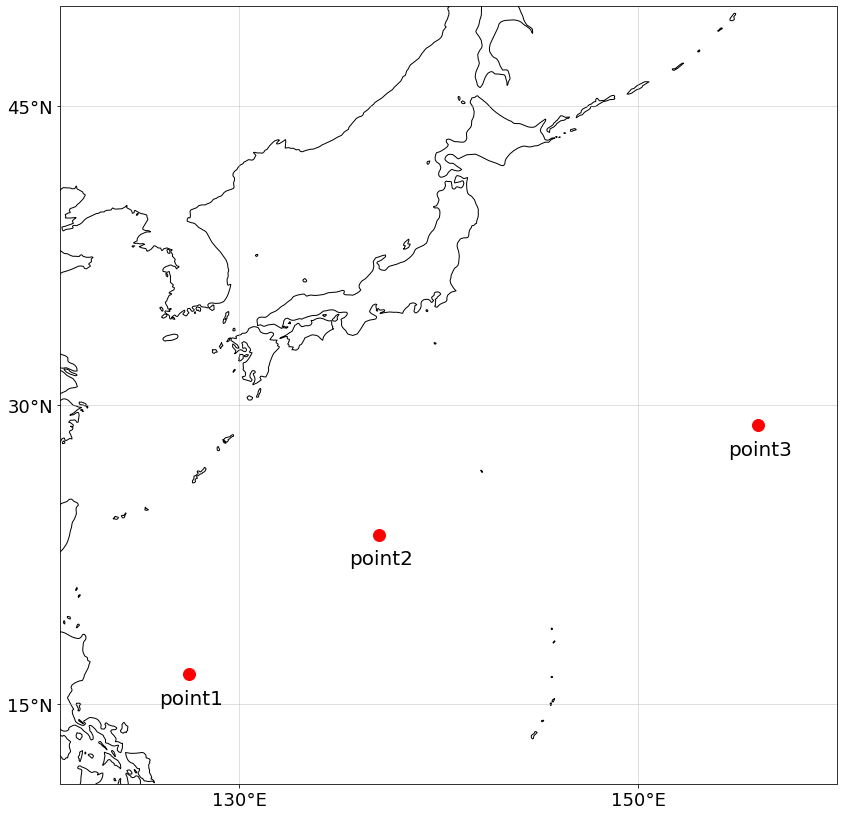

In [3]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import copy
import matplotlib as mpl
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker

"""
特定の場所をプロットする
"""


with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

INDEX = [79*67 + 13, 79*53 + 32, 79*42 + 70]

# 描画
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent((121, 160, 11, 50),ccrs.PlateCarree())
for i in range(3):
    index = INDEX[i]
    print(lons[index // 79][index % 79], lats[index // 79][index % 79])
    ax.plot(lons[index // 79][index % 79], lats[index // 79][index % 79], 'ro',markersize='12')
    ax.text(lons[index // 79][index % 79 - 3], lats[index // 79 + 3][index % 79], 'point'+ str(i+1), color='black', fontsize=20)
ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.axes.tick_params(labelsize=18)
ax.grid()
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img/plot.png")
plt.show()